In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print(df.shape)

(1338, 7)


In [5]:
df = df.dropna()

In [6]:
df.shape

(1338, 7)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.loc[150:170, ('age', 'sex', 'smoker', 'charges')]

,age,sex,smoker,charges
150,35,male,no,5125.21570
151,48,male,no,7789.63500
152,32,female,no,6334.34355
153,42,female,yes,19964.74630
154,40,female,no,7077.18940
155,44,male,no,6948.70080
156,48,male,yes,21223.67580
157,18,male,yes,15518.18025
158,30,male,yes,36950.25670
159,50,female,no,19749.38338


In [9]:
#count smok & no_smok
yes_smok = len(df[df['smoker'] == 'yes']) #274
no_smok = len(df[df['smoker'] == 'no']) #1064
print (str(no_smok) + " Smok-")
print (str(yes_smok) + " Smok+")

1064 Smok-
274 Smok+


In [10]:
columns_to_show = ['age', 'charges', 'bmi']

df.groupby(['smoker'])[columns_to_show].describe(percentiles=[])


age                                         charges                \
         count       mean        std   min   50%   max   count          mean   
smoker                                                                         
no      1064.0  39.385338  14.083410  18.0  40.0  64.0  1064.0   8434.268298   
yes      274.0  38.514599  13.923186  18.0  38.0  64.0   274.0  32050.231832   

                                                               bmi             \
                 std         min          50%          max   count       mean   
smoker                                                                          
no       5993.781819   1121.8739   7345.40530  36910.60803  1064.0  30.651795   
yes     11541.547176  12829.4551  34456.34845  63770.42801   274.0  30.708449   

                                          
             std     min      50%    max  
smoker                                    
no      6.043111  15.960  30.3525  53.13  
yes     6.318644  17.195  30.4475  52.58

In [11]:
columns_to_show = ['age', 'charges']

df.groupby(['smoker'])[columns_to_show].mean()

,age,charges
smoker,,
no,39.385338,8434.268298
yes,38.514599,32050.231832


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


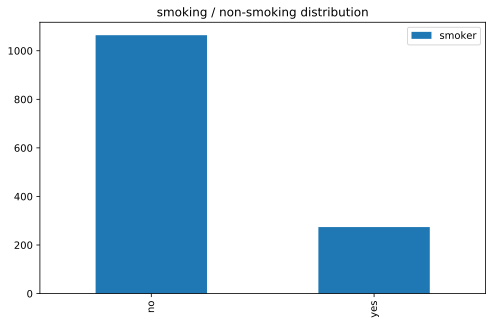

In [21]:
df['smoker'].value_counts().plot(kind='bar', label='smoker')
plt.legend()
plt.title('smoking / non-smoking distribution');

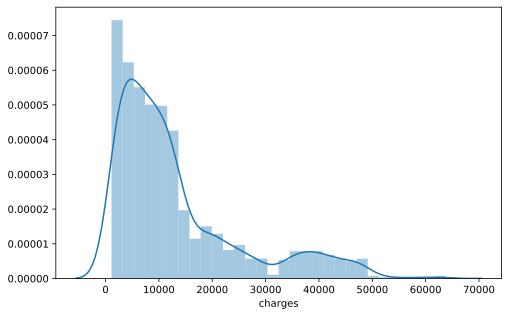

In [14]:
sns.distplot(df['charges'])


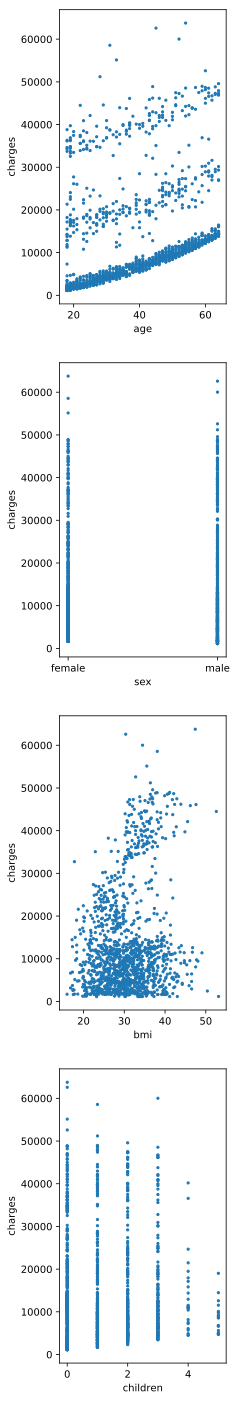

In [15]:
colnum=len(df.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in df.columns if i not in ["smoker","region","charges"]]):
    
    ax[ind].scatter(df[col],df.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

In [38]:
df1=(df['smoker']=='yes') & (df['bmi']> 30 )


df2=(df['smoker']=='no') & (df['bmi']> 30 )
df3=(df['smoker']=='yes') & (df['bmi']< 30 )

In [39]:
df[df1].describe()


,age,bmi,children,charges
count,144.000000,144.000000,144.000000,144.000000
mean,39.104167,35.544757,1.104167,41692.808992
std,14.361331,4.184624,1.113922,5829.158699
min,18.000000,30.020000,0.000000,32548.340500
25%,25.750000,32.275000,0.000000,37243.904350
50%,37.500000,34.960000,1.000000,40918.314500
75%,51.000000,37.207500,2.000000,45704.068725
max,64.000000,52.580000,4.000000,63770.428010


In [40]:
df[df2].describe()

,age,bmi,children,charges
count,561.000000,561.000000,561.000000,561.000000
mean,40.684492,35.213235,1.108734,8853.277294
std,14.414846,4.042432,1.211822,6105.077558
min,18.000000,30.020000,0.000000,1131.506600
25%,28.000000,32.110000,0.000000,4320.410850
50%,42.000000,34.200000,1.000000,8083.919800
75%,53.000000,37.430000,2.000000,11763.000900
max,64.000000,53.130000,5.000000,36910.608030


In [41]:
df[df3].describe()

,age,bmi,children,charges
count,129.000000,129.000000,129.000000,129.000000
mean,37.829457,25.315271,1.131783,21363.217016
std,13.493705,3.155758,1.207916,5066.780523
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,23.210000,0.000000,17663.144200
50%,38.000000,25.840000,1.000000,20167.336030
75%,48.000000,27.940000,2.000000,24106.912550
max,64.000000,29.925000,5.000000,38245.593270


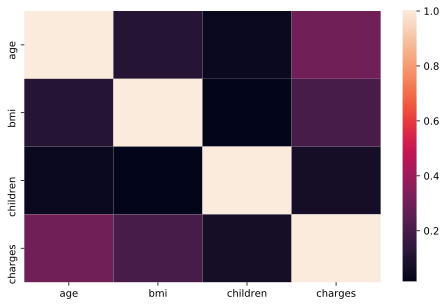

In [19]:
corr_matrix = df.drop(['sex', 'smoker', 'region'], axis=1).corr()
sns.heatmap(corr_matrix);


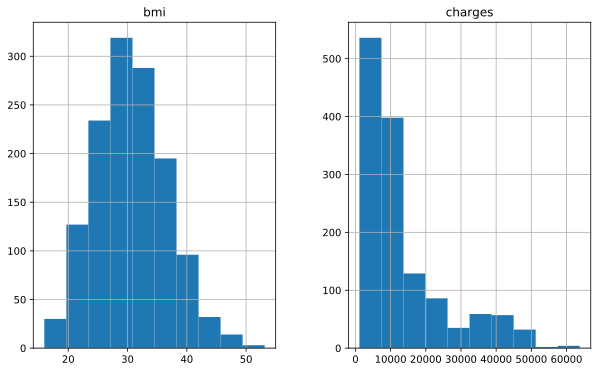

In [20]:
features = list(set(df.columns) - set(['age', 'children' ]))
                                     
df[features].hist(figsize=(10,6));



In [23]:
#Correlation:
sns.pairplot(df,height=1.8)

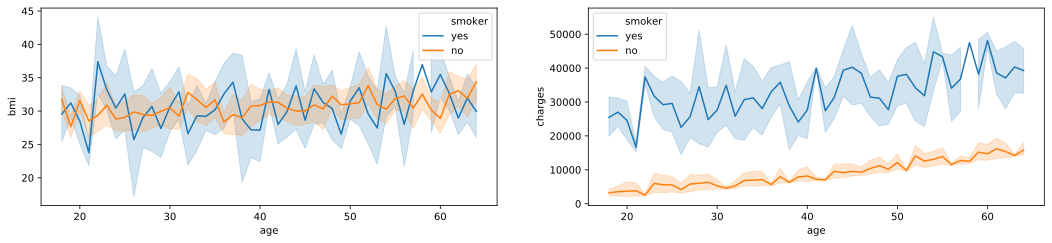

In [25]:
plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(221)
sns.lineplot(x="age",y="bmi",data=df,color="b",hue="smoker")

plt.subplot(222)
sns.lineplot(x="age",y="charges",data=df,color="g",hue="smoker")

In [ ]:
#Based on the analysis, we see that two variables, smoker and bmi, affect the target variable "charges".
#the cost of medical care significantly increases smoking than problems with overweight or underweight